In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Telecom companies (cable or wireless). These companies may provide a full range of products and services, 
including wireless network, internet, TV, cell phone, and home phone services (AT&T, Sprint, Verizon,
Cox Communications, etc.). Some specialize in mobile telecommunications (China Mobile, Vodafone, T-Mobile, etc.).

In [2]:
# Importing the dataset 
# Churn, rate at which customers stop doing business with a company over a given period of time
df = pd.read_csv('telecommunications_churn (1).csv')
df.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0

In [3]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [4]:
# shape
df.shape

(3333, 19)

In [5]:
print(df['churn'].value_counts())
print("The percentage of not churn", (2850/3333)*100)
print("The percentage of churn", (483/3333)*100)

0    2850
1     483
Name: churn, dtype: int64
The percentage of not churn 85.5085508550855
The percentage of churn 14.491449144914492


<AxesSubplot:>

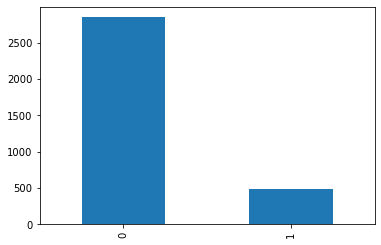

In [6]:
# Imbalanced dataset
# 1 = churn
# 0 = No churn
df['churn'].value_counts().plot(kind = 'bar')

In [7]:
# All the columns are in correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [8]:
# There is no missing values
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [9]:
# Statistical info of the data
df.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

<AxesSubplot:>

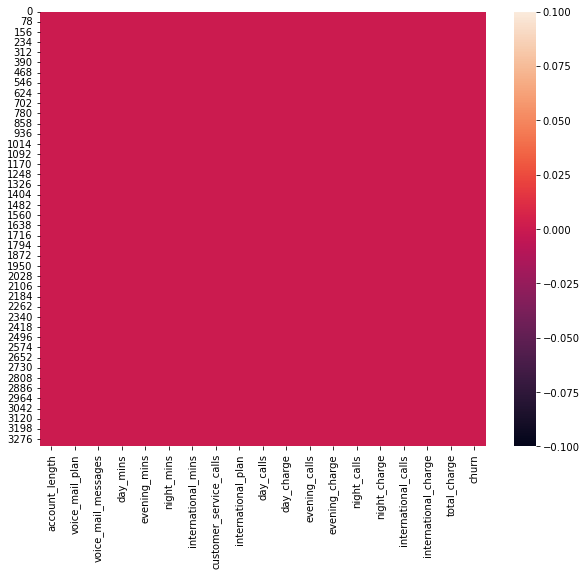

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [account_length, voice_mail_plan, voice_mail_messages, day_mins, evening_mins, night_mins, international_mins, customer_service_calls, international_plan, day_calls, day_charge, evening_calls, evening_charge, night_calls, night_charge, international_calls, international_charge, total_charge, churn]
Index: []

<AxesSubplot:>

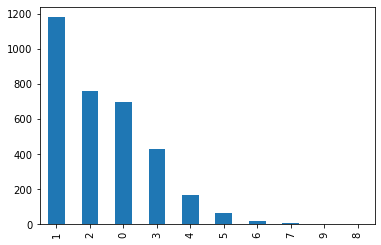

In [12]:
# Univariate Categorical features 
df['customer_service_calls'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

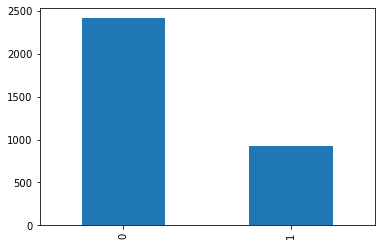

In [13]:
df['voice_mail_plan'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

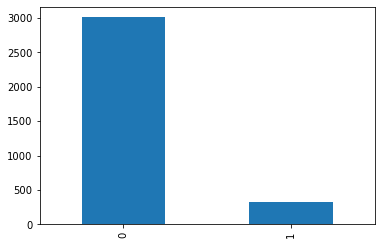

In [14]:
df['international_plan'].value_counts().plot(kind = 'bar')

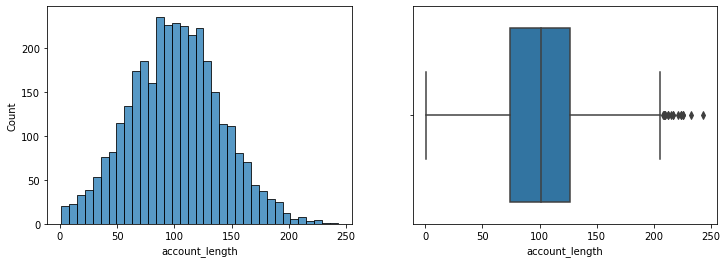

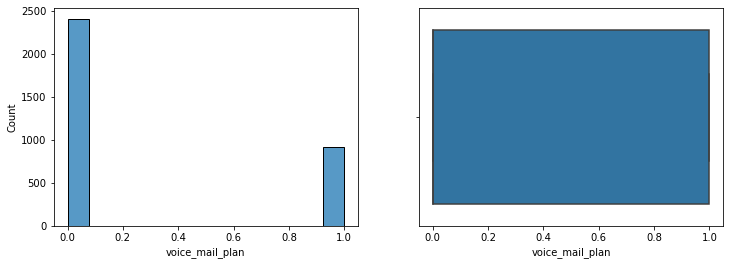

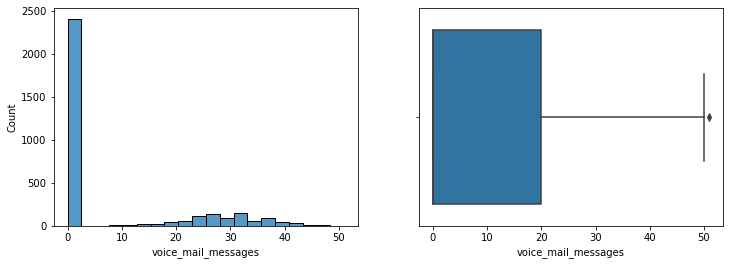

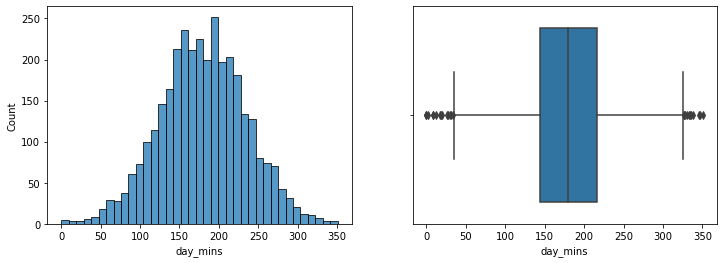

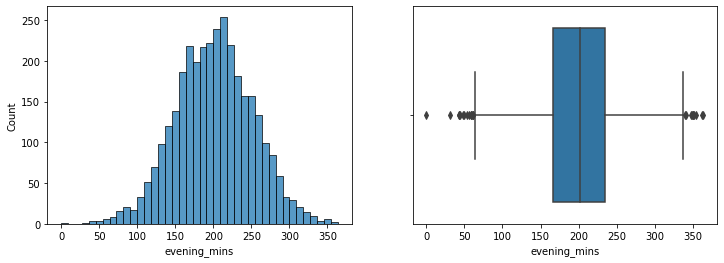

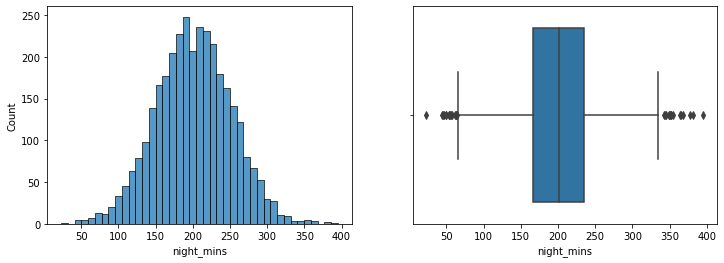

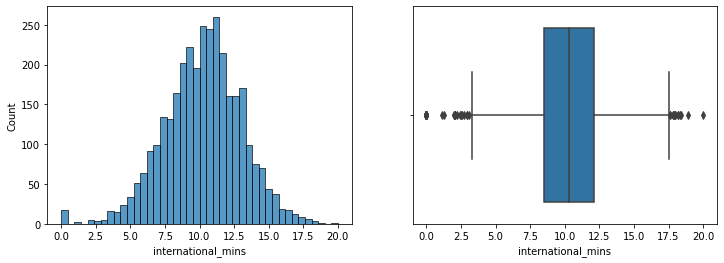

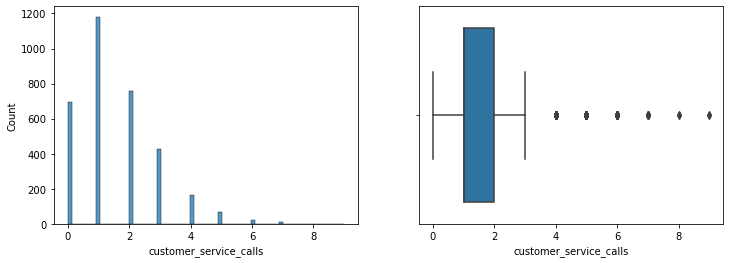

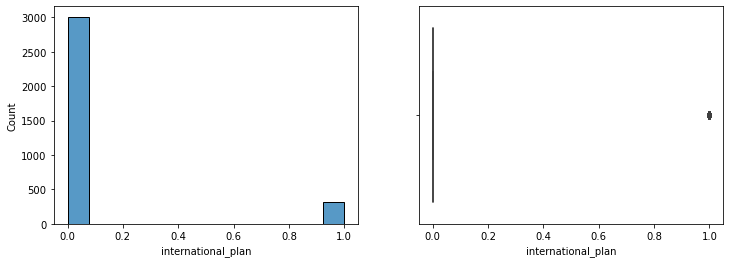

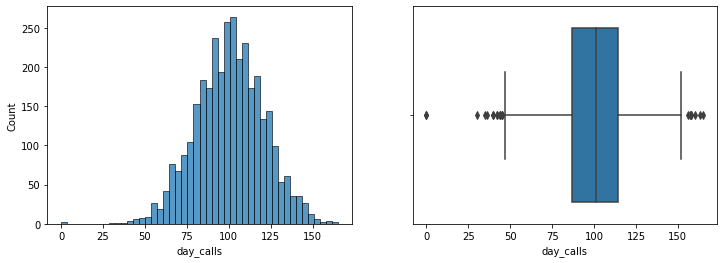

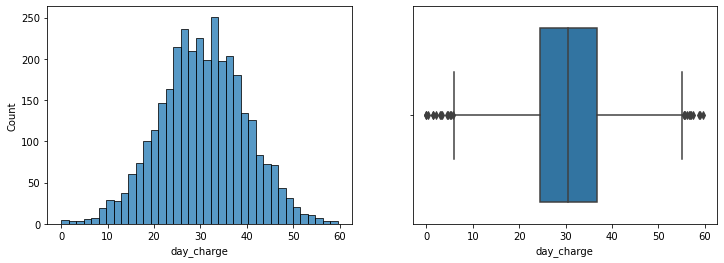

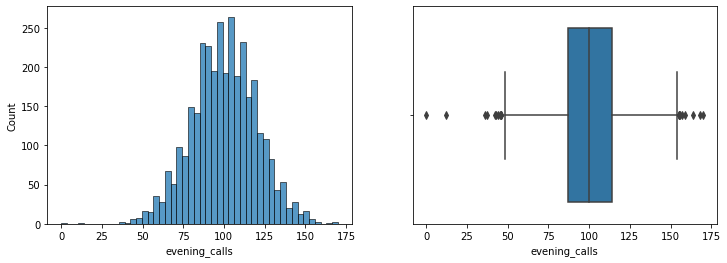

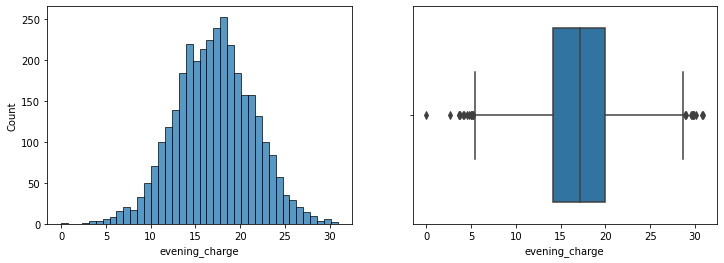

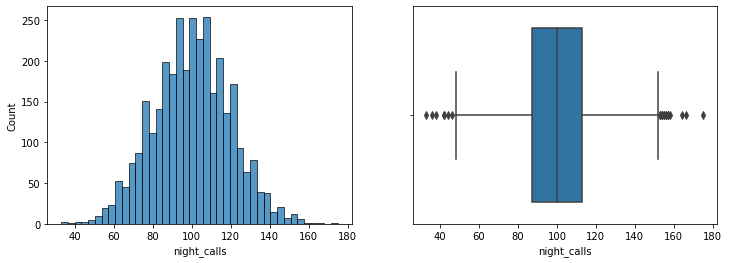

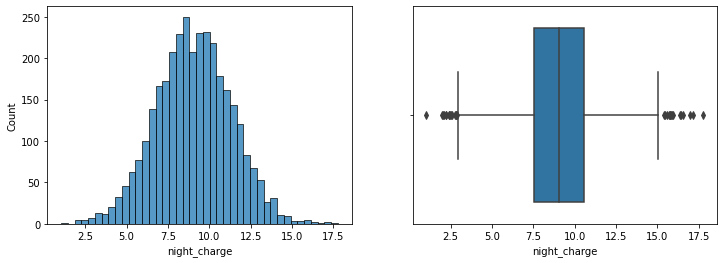

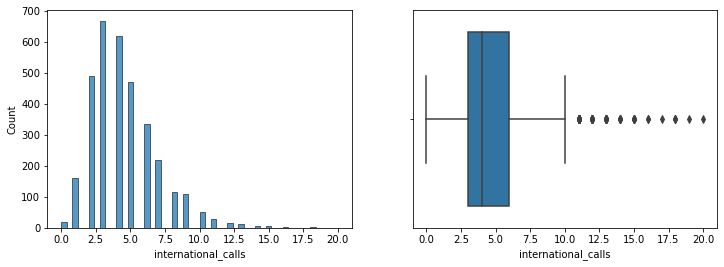

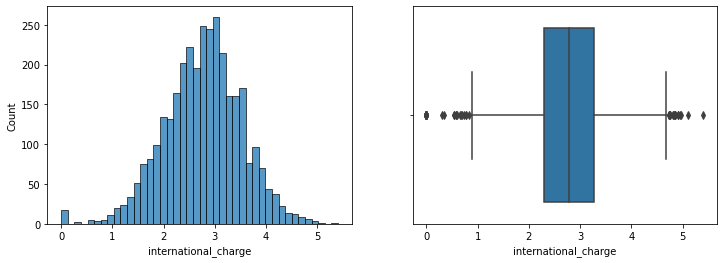

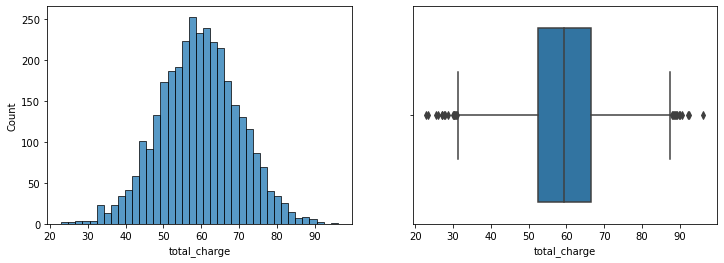

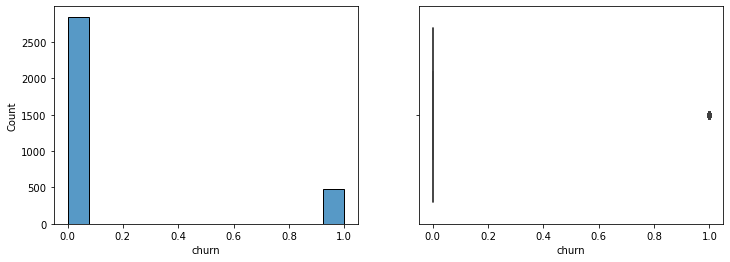

In [15]:
# Analyse all the features 
# Univariate analysis
for i in df.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) 
    sns.histplot(df[i], ax=ax[0])
    sns.boxplot(df[i], ax=ax[1])

<AxesSubplot:xlabel='voice_mail_plan', ylabel='Frequency'>

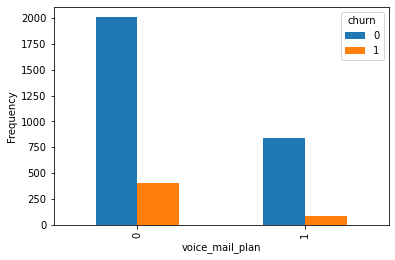

In [16]:
# Bivariate analysis
# Categorical Features
pd.crosstab(df['voice_mail_plan'], df['churn']).plot(kind="bar",ylabel='Frequency')

<AxesSubplot:xlabel='international_plan', ylabel='Frequency'>

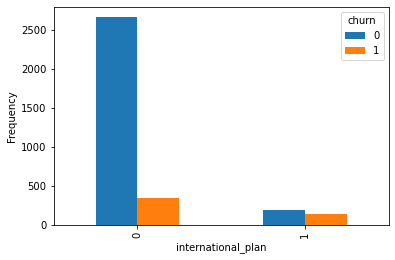

In [17]:
pd.crosstab(df['international_plan'], df['churn']).plot(kind="bar",ylabel='Frequency')

<AxesSubplot:>

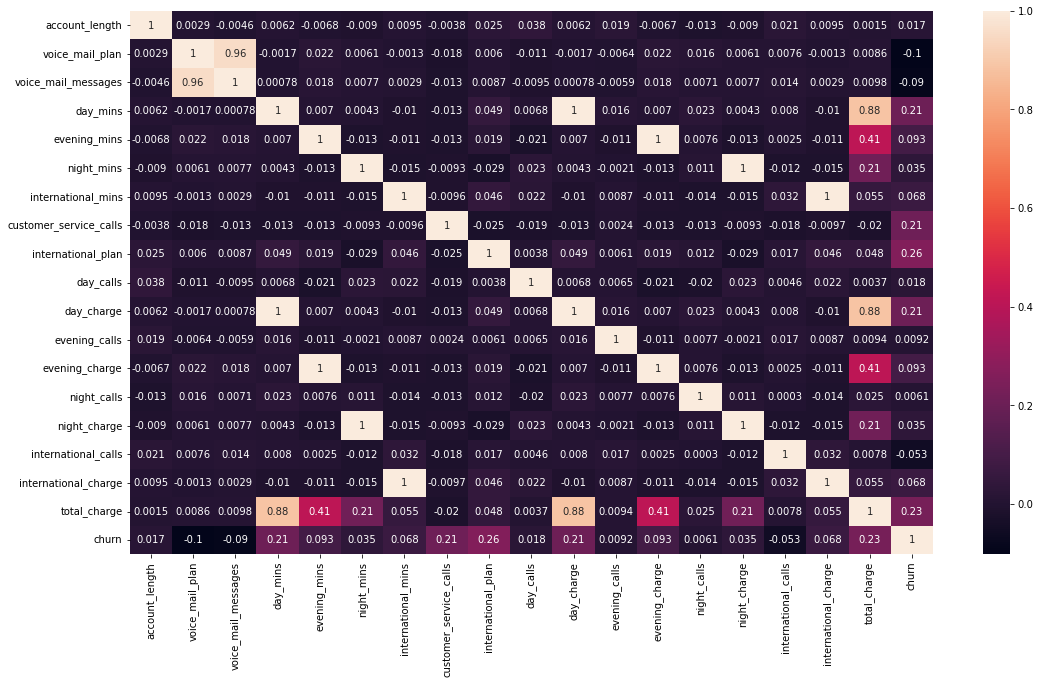

In [18]:
# Numerical features
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot= True)

In [19]:
import plotly.express as px
fig = px.scatter(df, x="day_mins", y="day_charge", color="churn", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [20]:
fig = px.scatter(df, x="evening_mins", y="evening_charge", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [21]:
fig = px.scatter(df, x="day_calls", y="day_charge", marginal_y="box",
           marginal_x="box", template="simple_white")
fig.show() 

In [22]:
import plotly.figure_factory as ff

# Add histogram data
x1 = df["day_calls"]
x2 = df["evening_calls"]
x3 = df["night_calls"]
x4 = df["international_calls"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Day calls', 'Evening calls', 'Night calls', 'International calls']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()
df1 = df[["day_calls","evening_calls","night_calls","international_calls"]].describe()
pd.DataFrame(df1)

day_calls  evening_calls  night_calls  international_calls
count  3333.000000    3333.000000  3333.000000          3333.000000
mean    100.435644     100.114311   100.107711             4.479448
std      20.069084      19.922625    19.568609             2.461214
min       0.000000       0.000000    33.000000             0.000000
25%      87.000000      87.000000    87.000000             3.000000
50%     101.000000     100.000000   100.000000             4.000000
75%     114.000000     114.000000   113.000000             6.000000
max     165.000000     170.000000   175.000000            20.000000

In [23]:
x1 = df["day_charge"]
x2 = df["evening_charge"]
x3 = df["night_charge"]
x4 = df["international_charge"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Day charge', 'Evening charge', 'Night charge', 'International charge']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()
df2 = df[["day_charge","evening_charge","night_charge","international_charge"]].describe()
pd.DataFrame(df2)

day_charge  evening_charge  night_charge  international_charge
count  3333.000000     3333.000000   3333.000000           3333.000000
mean     30.562307       17.083540      9.039325              2.764581
std       9.259435        4.310668      2.275873              0.753773
min       0.000000        0.000000      1.040000              0.000000
25%      24.430000       14.160000      7.520000              2.300000
50%      30.500000       17.120000      9.050000              2.780000
75%      36.790000       20.000000     10.590000              3.270000
max      59.640000       30.910000     17.770000              5.400000

In [24]:
# checking the number of unique values in the features
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("The number of unique values in ",i,  len(df[i].unique()))
    print("\n")

account_length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
The number of unique values in  account_length 212


voice_mail_plan
[1 0]
The number of unique values in  voice_mail_plan 2

In [25]:
columns = df.columns
columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [26]:
df['account_length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [27]:
df['account_length'].quantile(0.25)

74.0

In [28]:
df['account_length'].quantile(0.75)

127.0

In [30]:
def remove_outliers(list1):
    for i in list1:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5*IQR
        higher_fence = Q3 + 1.5*IQR
        df1 = df[(df[i] < lower_fence) | (df[i] > higher_fence)]
        df.drop(df1.index, axis = 0 , inplace = True)
    return df

In [31]:
list1 = ['account_length','voice_mail_messages', 'day_mins','evening_mins', 'night_mins',
         'international_mins', 'international_plan','evening_charge','night_charge', 'international_charge',
       'total_charge']
list1

['account_length',
 'voice_mail_messages',
 'day_mins',
 'evening_mins',
 'night_mins',
 'international_mins',
 'international_plan',
 'evening_charge',
 'night_charge',
 'international_charge',
 'total_charge']

In [32]:
remove_outliers(list1)

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
10                65                0                    0     129.1   
11                74                0                    0     187.7   
...              ...              ...                  ...       ...   
3327              79                0                    0     134.7   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
10           228.5       208.8                12.7                       4   
11           163.4       196.0                 9.1                       0   
...            ...         ...                 ...                     ...   
3327         189.7       221.4                11.8                       2   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
10                     0        137       21.95             83   
11                     0        127       31.91            148   
...                  ...        ...         ...            ...   
3327                   0         98       22.90             68   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
10             19.42          111          9.40                    6   
11             13.89           94          8.82                    5   
...              ...          ...           ...                  ...   
3327           16.12          128          9.96                    5   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
10                    3.43         54.20      1  
11                    2.46         57.08      0  
...                    ...           ...    ...  
3327                  3.19         52.17      0  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      

In [33]:
df.shape

(2858, 19)

In [34]:
# Divide the dataset into features and target cariable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
# Splitting the dataset training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 18)
(858, 18)
(2000,)
(858,)


In [37]:
# MinMax scaler to make the magnitude similar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
x_train_scale = scaler.fit_transform(x_train)
x_tests_scale = scaler.transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scale, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(x_tests_scale)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
# We can see that it gives bad score for recall and f1_score
# Non linear data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       757
           1       0.82      0.09      0.16       101

    accuracy                           0.89       858
   macro avg       0.85      0.54      0.55       858
weighted avg       0.88      0.89      0.85       858



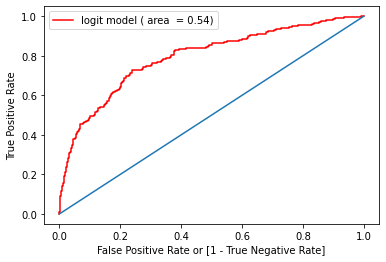

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train_scale)[:,-1])
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [68]:
# Decision Tree
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{'criterion':['gini', 'entropy'], 'max_depth' : [5,10,15,20], 'min_samples_split' : [5,10,15,20]}]
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
gsv = GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 20],
                          'min_samples_split': [5, 10, 15, 20]}])

In [69]:
gsv.best_params_ , gsv.best_score_ 

({'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10},
 0.9760000000000002)

In [70]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [71]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       757
           1       0.99      0.84      0.91       101

    accuracy                           0.98       858
   macro avg       0.98      0.92      0.95       858
weighted avg       0.98      0.98      0.98       858



In [ ]:
fn=['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']
cn=[0,1]
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [79]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = [{'criterion':['gini', 'entropy'], 'n_estimators' : [150,200,250,300],'max_features':[4,6,8,10]}]
gsv = GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [4, 6, 8, 10],
                          'n_estimators': [150, 200, 250, 300]}])

In [81]:
gsv.best_params_ , gsv.best_score_ 

({'criterion': 'entropy', 'max_features': 8, 'n_estimators': 250},
 0.9760000000000002)

In [83]:
# Final model
model = RandomForestClassifier(n_estimators=250,criterion='entropy',max_features=8)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=250)

In [85]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       757
           1       1.00      0.84      0.91       101

    accuracy                           0.98       858
   macro avg       0.99      0.92      0.95       858
weighted avg       0.98      0.98      0.98       858



In [93]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
param_grid = [{'n_estimators': [200,250,300], 'learning_rate':[0.001,0.01,0.1,0.25,0.6,0.9]}]
gsv = GridSearchCV(model, param_grid, cv = 10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.6, 0.9],
                          'n_estimators': [200, 250, 300]}])

In [94]:
gsv.best_params_ , gsv.best_score_ 

({'learning_rate': 0.6, 'n_estimators': 200}, 0.9295000000000002)

In [95]:
model  = AdaBoostClassifier(n_estimators=200, learning_rate=0.6)
model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=200)

In [96]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [97]:
# less accuracy compare to DT, RF
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       757
           1       0.76      0.56      0.65       101

    accuracy                           0.93       858
   macro avg       0.85      0.77      0.80       858
weighted avg       0.92      0.93      0.92       858



In [100]:
# Xgboost 
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [101]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       757
           1       1.00      0.84      0.91       101

    accuracy                           0.98       858
   macro avg       0.99      0.92      0.95       858
weighted avg       0.98      0.98      0.98       858



In [103]:
!pip install streamlit